# Multi-Knapsack Experiments

Comparison to [Hess et. al, 2024](https://github.com/QutacQuantum/effective_inequality_embedding) inequality constraint embedding.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import dimod
import numpy as np

from evaluation import ResultStorage, RESULTS
from instances import InstanceManager
sns.set(style="whitegrid", palette="colorblind")

In [2]:
# Load results from csv
rs = ResultStorage(RESULTS / "multi_knapsack.csv")
# Get mutliple metrics including p_opt and p_90
df = rs.get_df("rel_energy_error", "p_opt", "p_90", "n_qubits", "layer", "tts", "feasibility_ratio", "opt_params", "optimizer")

# extract scenaro number from ID
df["scenario"] = df["id"].transform(lambda x: int(x.split("_")[1][:-3]))

Loading '/Users/david/work/q-grid/mulit-constrained-qaoa-data/notebooks/../results/multi_knapsack.csv'... 
Done 230


In [3]:
# Load the TAE results, generated with https://github.com/QutacQuantum/effective_inequality_embedding
df_tae = pd.read_csv(RESULTS / "tae.csv")
df_tae_standard = pd.read_csv(RESULTS / "tae_standard.csv")

In [4]:
# Load random probabilities
df_rnd = pd.read_csv(RESULTS / "mks_rnd.csv", index_col=0)

rnd_90 = dict(df_rnd["rnd_90"])
rnd_opt = dict(df_rnd["rnd_opt"])

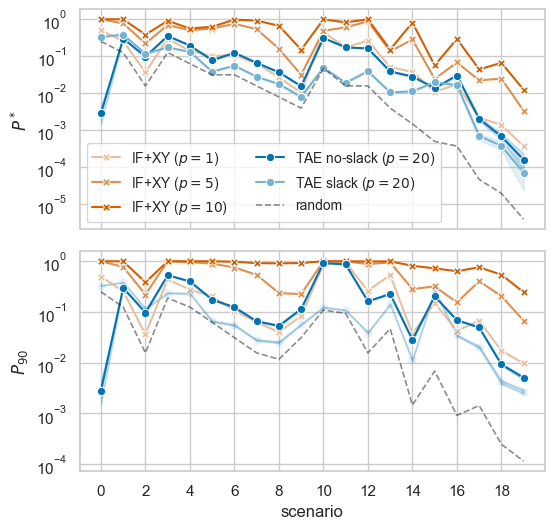

In [5]:
# Plot the results
fig, axs = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

df["Layer"] = df.layer.transform(lambda x: f"IF+XY ($p={x}$)")

# use the light of the fourth colorblind color
p = sns.color_palette("colorblind", 4)
palette = sns.light_palette(p[3], 4)[1:]

# only slect QAOA layers 1, 5 and 10
df_select = df.query("layer in [1, 5, 10] and scenario <= 19").sort_values("layer")

# lineplots of p_opt data
sns.lineplot(df_select, x="scenario", y="p_opt", hue="Layer", marker="X", palette=palette, ax=axs[0])
sns.lineplot(df_tae, x="scenario", y="popt", marker="o", label="TAE no-slack ($p=20$)", color=p[0], ax=axs[0])
sns.lineplot(df_tae_standard, x="scenario", y="popt", marker="o", label="TAE slack ($p=20$)", color=sns.light_palette(p[0], 3)[1], ax=axs[0])
axs[0].plot(rnd_opt.keys(), rnd_opt.values(), "--", color="k", alpha=0.5, label="random", linewidth=1.2)

axs[0].set_yscale("log")
axs[0].legend(ncols=2, fontsize=10)
axs[0].set_ylabel("$P^*$")

# -------------------------

# lineplots of p_90 data
sns.lineplot(df_select, x="scenario", y="p_90", hue="Layer", marker="X", palette=palette, ax=axs[1], legend=False)
sns.lineplot(df_tae, x="scenario", y="p90", marker="o", color=p[0], ax=axs[1])
sns.lineplot(df_tae_standard, x="scenario", y="p90", marker="o", color=p[0], ax=axs[1], alpha=0.1)
axs[1].plot(rnd_90.keys(), rnd_90.values(), "--", color="k", alpha=0.5, linewidth=1.2)

axs[1].set_yscale("log")
axs[1].set_ylabel("$P_{90}$")


# reset x-ticks
axs[0].set_xticks(range(0, 20, 2))

# adjust spacing
fig.subplots_adjust(hspace=0.1)

# plt.savefig("plots/multi_knapsack.pdf", bbox_inches="tight")